### Given Flag to the image

#### imports

In [3]:
import cv2 as cv
import numpy as np
from skimage import transform
import matplotlib.pyplot as plt

#### Finding coordinates

In [45]:
# Load the images
im1 = cv.imread('utils/005.jpg')
im2 = cv.imread('utils/flag.png')
assert im1 is not None and im2 is not None, "Error loading images"

# Number of points to select
N = 4
selected_points = np.empty((N, 2), dtype=np.float32)
current_point = 0

# Callback function to handle mouse events
def select_points(event, x, y, flags, param):
    global current_point
    if event == cv.EVENT_LBUTTONDOWN and current_point < N:
        cv.circle(param, (x, y), 5, (0, 255, 0), -1)
        selected_points[current_point] = (x, y)
        current_point += 1

# Make a copy of the image to draw on
im1_copy = im1.copy()

# Set up the window and callback
cv.namedWindow('Image 1', cv.WINDOW_AUTOSIZE)
cv.setMouseCallback('Image 1', select_points, im1_copy)

# Event loop to display the image and capture points
while current_point < N:
    cv.imshow('Image 1', im1_copy)
    if cv.waitKey(0) & 0xFF == 27:  # Exit on 'Esc' key
        break

cv.destroyAllWindows()

# Print the selected points
dst_points = selected_points
print("Selected points:", dst_points)

Selected points: [[229. 166.]
 [210. 532.]
 [461. 546.]
 [464. 305.]]


#### Function to Overlay image

In [5]:
def overlay_image(main_img, logo_img, corners, opacity_logo=0.3, opacity_img=1):
    
    # Extract the logo image's dimensions
    logo_height, logo_width, _ = logo_img.shape
    source_points = np.array([[0, 0], [logo_width, 0], [logo_width, logo_height], [0, logo_height]])
    src_corners = np.array([np.array(pt) for pt in source_points])

    # Pad the logo if necessary to match the size of the main image
    if logo_img.shape[0] <= main_img.shape[0]:
        logo_img = np.pad(logo_img, ((0, main_img.shape[0] - logo_img.shape[0]), (0, 0), (0, 0)), 'constant')

    if logo_img.shape[1] <= main_img.shape[1]:
        logo_img = np.pad(logo_img, ((0, 0), (0, main_img.shape[1] - logo_img.shape[1]), (0, 0)), 'constant')

    # Estimate the transformation from source corners to destination corners
    transformation_matrix = transform.estimate_transform('projective', src_corners, corners)
    warped_logo = transform.warp(logo_img, transformation_matrix.inverse)
    warped_logo = (warped_logo * 255).astype(np.uint8)

    # Adjust warped logo dimensions if they exceed the main image dimensions
    if logo_img.shape[0] > main_img.shape[0]:
        warped_logo = warped_logo[:main_img.shape[0]]

    if logo_img.shape[1] > main_img.shape[1]:
        warped_logo = warped_logo[:, :main_img.shape[1]]

    # Blend the images using cv.addWeighted
    blended_img = cv.addWeighted(main_img, opacity_img, warped_logo, opacity_logo, 0)
    
    return blended_img


#### Display

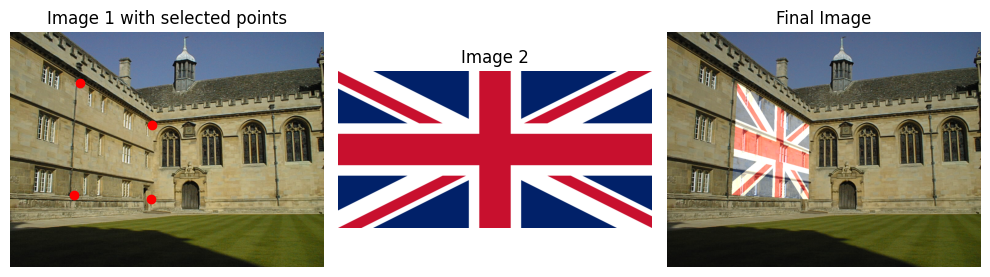

In [46]:
im1 = cv.imread("utils/005.jpg")
im1 = cv.cvtColor(im1, cv.COLOR_BGR2RGB)

im2 = cv.imread("utils/flag.png")
im2 = cv.cvtColor(im2, cv.COLOR_BGR2RGB) 

dst_points =  [(461, 546), (210, 532),(229, 166), (464, 305)   ]
dst_points = np.array([np.array(p) for p in dst_points])

dst = overlay_image(im1, im2, dst_points, 0.6, 0.9)

plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(im1)
plt.scatter(dst_points[:, 0], dst_points[:, 1], color = 'red')
plt.title("Image 1 with selected points")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(im2)
plt.title("Image 2")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(dst)
plt.title("Final Image")
plt.axis('off')

plt.tight_layout()

## To Own Images

#### Imports

In [10]:
import cv2 as cv
import numpy as np
from skimage import transform
import matplotlib.pyplot as plt

#### Finding Coordinates

In [37]:
# Load the images
im1 = cv.imread('utils/bridge.jpg')
im2 = cv.imread('utils/flower.jpg')
assert im1 is not None and im2 is not None, "Error loading images"

# Number of points to select
N = 4
selected_points = np.empty((N, 2), dtype=np.float32)
current_point = 0

# Callback function to handle mouse events
def select_points(event, x, y, flags, param):
    global current_point
    if event == cv.EVENT_LBUTTONDOWN and current_point < N:
        cv.circle(param, (x, y), 5, (0, 255, 0), -1)
        selected_points[current_point] = (x, y)
        current_point += 1

# Make a copy of the image to draw on
im1_copy = im1.copy()

width = 1000  # Desired width
height = 800  # Desired height
resized_image = cv.resize(im1_copy, (width, height))

# Set up the window and callback
cv.namedWindow('Image 1', cv.WINDOW_AUTOSIZE)
cv.setMouseCallback('Image 1', select_points, im1_copy)

# Event loop to display the image and capture points
while current_point < N:
    cv.imshow('Image 1', resized_image)
    if cv.waitKey(0) & 0xFF == 27:  # Exit on 'Esc' key
        break

cv.destroyAllWindows()

# Print the selected points
dst_points = selected_points
print("Selected points:", dst_points)

Selected points: [[410. 449.]
 [608. 444.]
 [293. 779.]
 [740. 778.]]


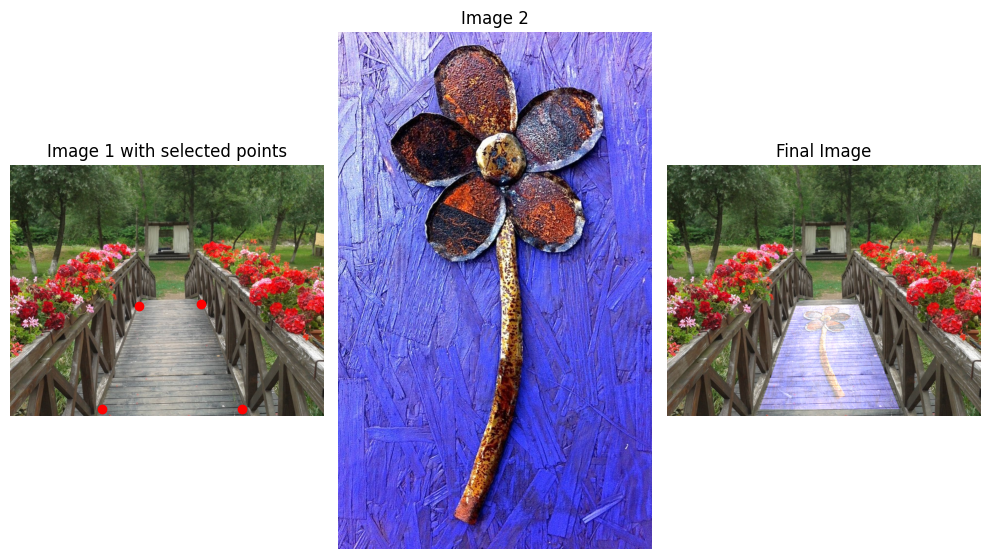

In [44]:
img1 = cv.cvtColor(resized_image,cv.COLOR_BGR2RGB)

img2 = cv.imread("utils/flowerimg.jpg")
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB) 

dst_points =  [(608, 444),(410, 449), (293, 779),(740, 778) ]
dst_points = np.array([np.array(p) for p in dst_points])

dst = overlay_image(img1, img2, dst_points, 0.5, 1)

plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(img1)
plt.scatter(dst_points[:, 0], dst_points[:, 1], color = 'red')
plt.title("Image 1 with selected points")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img2)
plt.title("Image 2")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(dst)
plt.title("Final Image")
plt.axis('off')

plt.tight_layout()